<a href="https://colab.research.google.com/github/konrad98ft/cutting-inserts-detection/blob/master/cutting_inserts_deepl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [5]:
import urllib.request
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

# Freeze existing layers
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

data_set_path = '/content/drive/MyDrive/cutting-inserts-samples/DATA_SET_3/'
extract_folder_path = '/content/DATA_SET_3/'
#TRANING
training_file_name = data_set_path + "traning.zip"
training_dir = extract_folder_path + 'traning/'
zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

#VALIDATION
validation_file_name = data_set_path + "validation.zip"
validation_dir = extract_folder_path + 'validation/'
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

#TEST
test_file_name = data_set_path + "test.zip"
test_dir = extract_folder_path + 'test/'
zip_ref = zipfile.ZipFile(test_file_name, 'r')
zip_ref.extractall(test_dir)
zip_ref.close()





last layer output shape:  (None, 7, 7, 768)


In [6]:
train_good_inserts_names = os.listdir(training_dir+'samples_good')
print(train_good_inserts_names[:8])

train_faulty_inserts_human_names = os.listdir(training_dir+'samples_faulty')
print(train_faulty_inserts_human_names[:8])




['g11.png', 'g93.png', 'g120.png', 'g117.png', 'g122.png', 'g102.png', 'g133.png', 'g98.png']
['f1.png', 'f48.png', 'f30.png', 'f31.png', 'f43.png', 'f16.png', 'f40.png', 'f7.png']


In [14]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))


history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=20,
            verbose=1)

Found 132 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/20
7/7 [==============================] - 1s 143ms/step - loss: 1.3912e-05 - acc: 1.0000 - val_loss: 0.0613 - val_acc: 0.9773
Epoch 2/20
7/7 [==============================] - 1s 134ms/step - loss: 1.1279e-05 - acc: 1.0000 - val_loss: 0.0383 - val_acc: 0.9773
Epoch 3/20
7/7 [==============================] - 1s 132ms/step - loss: 4.4711e-06 - acc: 1.0000 - val_loss: 0.0560 - val_acc: 0.9773
Epoch 4/20
7/7 [==============================] - 1s 131ms/step - loss: 1.1874e-05 - acc: 1.0000 - val_loss: 0.1054 - val_acc: 0.9545
Epoch 5/20
7/7 [==============================] - 1s 129ms/step - loss: 6.5030e-06 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9773
Epoch 6/20
7/7 [==============================] - 1s 134ms/step - loss: 2.4880e-06 - acc: 1.0000 - val_loss: 0.0663 - val_acc: 0.9773
Epoch 7/20
7/7 [==============================] - 1s 138ms/step - loss: 1.1717e-06 - acc: 1.0000 - val_loss: 0.0575

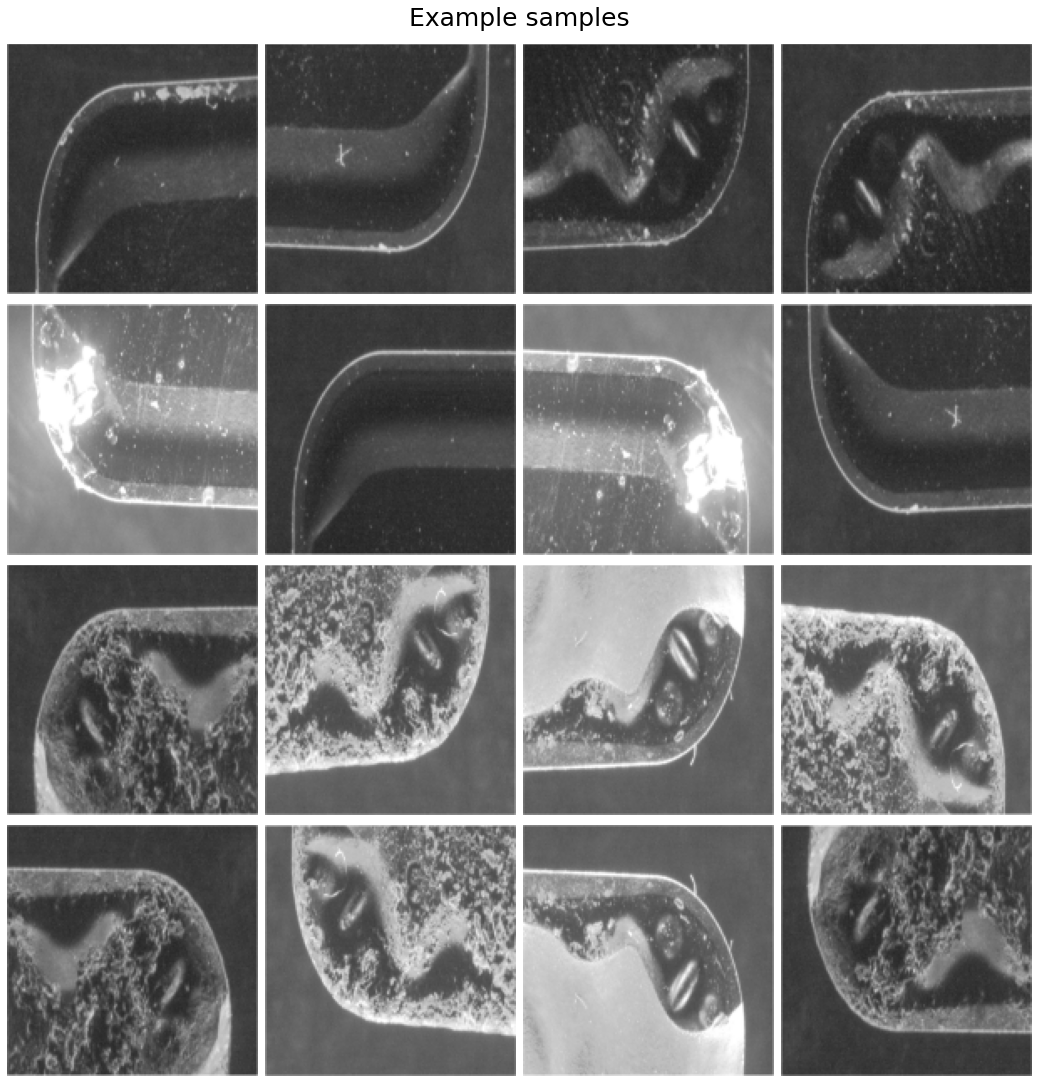

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_good_inserts_names = os.listdir(test_dir+'samples_good')
test_faulty_inserts_names = os.listdir(test_dir+'samples_faulty')

%matplotlib inline
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 8
next_good_pix = [os.path.join(test_dir+'samples_good', fname) 
                for fname in test_good_inserts_names[pic_index-8:pic_index]]
next_faulty_pix = [os.path.join(test_dir+'samples_faulty', fname) 
                for fname in test_faulty_inserts_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_good_pix + next_faulty_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
fig.suptitle("Example samples",fontsize=25)
plt.tight_layout(pad=6, w_pad=0.5, h_pad=1.0)
plt.show()

In [16]:
next_good_pix = [os.path.join(test_dir + 'samples_good', fname) 
                for fname in test_good_inserts_names[:]]
next_faulty_pix = [os.path.join(test_dir + 'samples_faulty', fname) 
                for fname in test_faulty_inserts_names[:]]

uploaded = next_faulty_pix + next_good_pix

classification = []

for fn in uploaded:
  img = image.load_img(fn, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x/=255
  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  classification.append(classes)




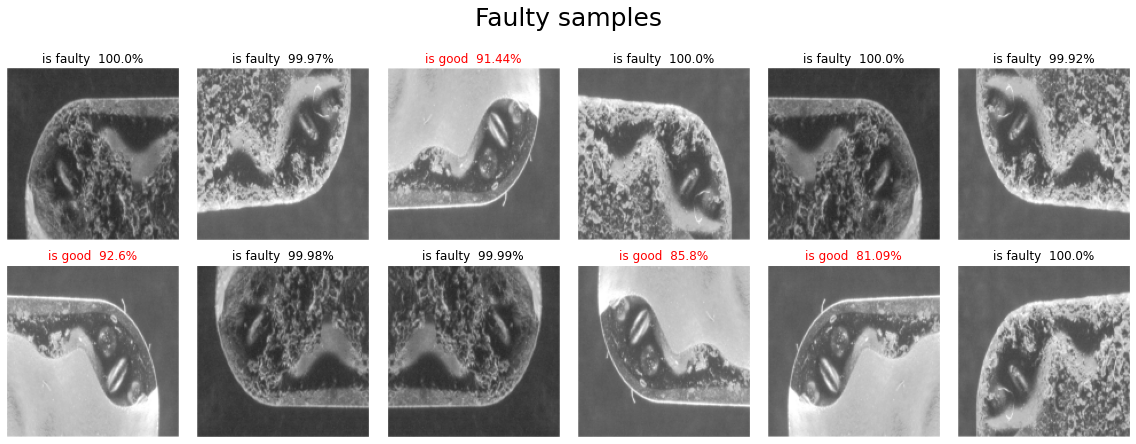

In [17]:
wrong_faulty_identification = 0 
n_cols = 6
n_rows = int(len(next_faulty_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for i, img_path in enumerate(next_faulty_pix):
  if classification[i] > 0.5:
    title =  "is good  " + str(round(float((classification[i])*100),2)) + "%"
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
    wrong_faulty_identification += 1
  else:
    title =  "is faulty  " + str(round(float((1-classification[i])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
 
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Faulty samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

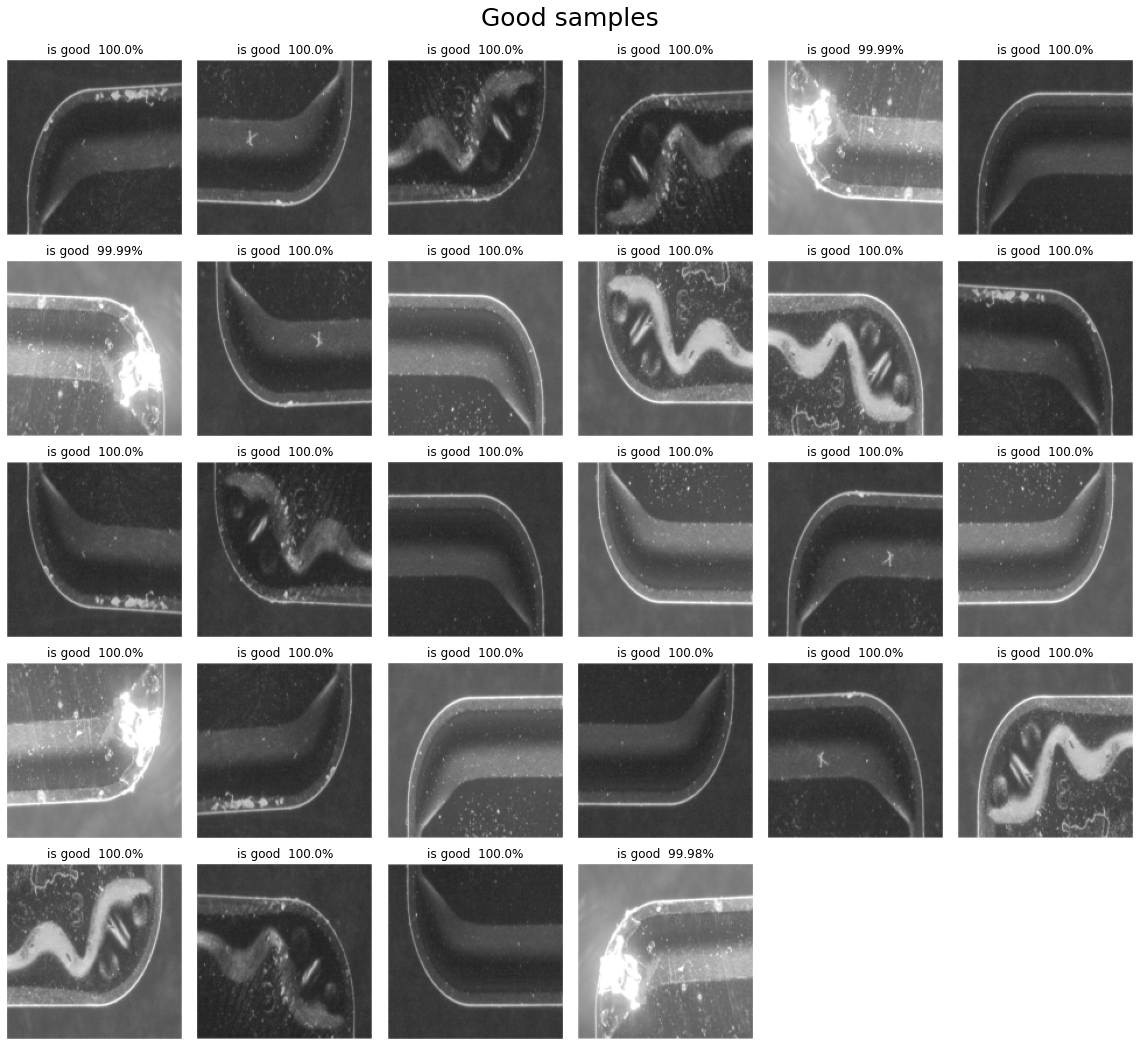

In [11]:
wrong_good_identification = 0 
n_cols = 6
n_rows = int(len(next_good_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for j, img_path in enumerate(next_good_pix):
  
  if classification[j+i+1] > 0.5:
    title =  "is good  " + str(round(float((classification[j+i+1])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
  else:
    title =  "is faulty  " + str(round(float((1-classification[j+i+1])*100),2)) + "%"
    wrong_good_identification +=1
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
  
  sp = plt.subplot(n_rows, n_cols, j + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Good samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

In [12]:
wrong_identification = wrong_good_identification + wrong_faulty_identification
correct = len(uploaded)-wrong_identification
print("Number of test images:",len(uploaded))
print("Identified corectly:",correct)
print("Identified incorectly:",wrong_identification)
print("Accuracy: {:.2f}%".format(correct/len(uploaded)*100))

Number of test images: 40
Identified corectly: 36
Identified incorectly: 4
Accuracy: 90.00%


In [13]:
# TESTING NEW IMAGES - NEED TO UPDATE IT
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x/=255

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is good")
  else:
    print(fn + " is faulty")
 

Saving f52.png to f52.png
Saving f22.png to f22.png
Saving f23.png to f23.png
Saving f47.png to f47.png
[[0.9059613]]
[0.9059613]
f52.png is good
[[7.579482e-06]]
[7.579482e-06]
f22.png is faulty
[[6.7525754e-05]]
[6.7525754e-05]
f23.png is faulty
[[5.8696224e-07]]
[5.8696224e-07]
f47.png is faulty
